<a href="https://colab.research.google.com/github/pastal24/rep/blob/master/cnn_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pickle
import pandas as pd
import numpy as np
objects={}

infile = open(r"/content/gdrive/My Drive/GdataML1.pickle",'rb')
objects = pickle.load(infile, encoding='latin1')
# φορτώνουμε απαραίτητες βιβλιοθήκες και ανοίγουμε το αρχείο


In [ ]:
objects.keys()

dict_keys(['y', 'X_flight', 'ids', 'X_hold', 'time'])

In [ ]:
npa = np.asarray([objects['X_flight'],objects['X_hold']])
npa.shape
npa=npa.swapaxes(0,1)
npa.shape

(19055, 2, 100)

In [ ]:
npa = np.asarray([objects['X_flight'],objects['X_hold']])
npa.shape
npa=npa.swapaxes(0,1)

df=pd.DataFrame(objects['X_hold'])
df.shape
npa2=np.asarray(df)
npa2.shape

df1=pd.DataFrame(objects['X_flight'])
df1.shape
npa3=np.asarray(df1)
npa3.shape
npa=np.dstack((npa2,npa3))
npa.shape
npa=np.nan_to_num(npa)
npa.shape
npa=npa.swapaxes(1,2)
npa.shape

(19055, 2, 100)

In [ ]:

x_train,x_test = npa[:17000,:,:],npa[17000:,:,:]
x_train.shape

(17000, 2, 100)

In [ ]:
x_train = x_train.reshape(-1, 2, 100 , 1)
x_test = x_test.reshape(-1, 2, 100 , 1)

x_test.shape

(2055, 2, 100, 1)

In [ ]:
import sys,os,os.path
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [ ]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D , Flatten ,Reshape ,Dropout,BatchNormalization,Activation
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras import backend as K
from keras.regularizers import l1
import tensorflow

In [ ]:
autoencoder = tensorflow.keras.Sequential()


autoencoder.add(Conv2D(64, (2, 3), activation='relu', padding='same', input_shape=x_train.shape[1:]))

autoencoder.add(MaxPooling2D((1, 2), padding='same'))

autoencoder.add(Conv2D(32, (2, 3), activation='relu', padding='same'))
#μέχρι εδώ είναι ο encoder 


autoencoder.add(UpSampling2D((1, 2)))


autoencoder.add(Conv2D(64, (2, 3), activation='relu', padding='same'))


autoencoder.add(Conv2D(1, (2, 3), activation='linear', padding='same'))

autoencoder.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 2, 100, 64)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 50, 64)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 2, 50, 32)         12320     
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 2, 100, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 2, 100, 64)        12352     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 2, 100, 1)         385       
Total params: 25,505
Trainable params: 25,505
Non-trainable params: 0
__________________________________________________

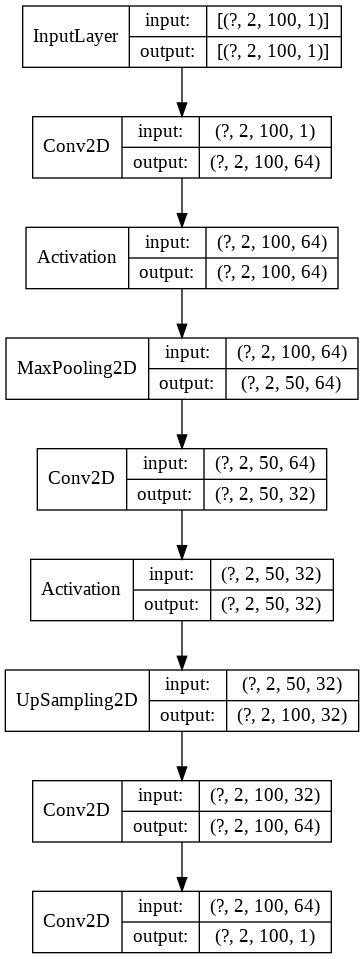

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# rlr = ReduceLROnPlateau(monitor='loss', patience=1, verbose=1)
!pip install plot-model
from tensorflow.keras.utils import plot_model
plot_model(autoencoder, show_shapes=True, show_layer_names=False)

Epoch 1/40
67/67 [==============================] - 1s 17ms/step - loss: 0.0290 - mae: 0.0740 - val_loss: 0.0398 - val_mae: 0.0908
Epoch 2/40
67/67 [==============================] - 1s 10ms/step - loss: 0.0199 - mae: 0.0554 - val_loss: 0.0378 - val_mae: 0.0874
Epoch 3/40
67/67 [==============================] - 1s 9ms/step - loss: 0.0147 - mae: 0.0475 - val_loss: 0.0367 - val_mae: 0.0837
Epoch 4/40
67/67 [==============================] - 1s 9ms/step - loss: 0.0125 - mae: 0.0427 - val_loss: 0.0335 - val_mae: 0.0795
Epoch 5/40
67/67 [==============================] - 1s 9ms/step - loss: 0.0109 - mae: 0.0391 - val_loss: 0.0309 - val_mae: 0.0759
Epoch 6/40
67/67 [==============================] - 1s 9ms/step - loss: 0.0097 - mae: 0.0373 - val_loss: 0.0268 - val_mae: 0.0703
Epoch 7/40
67/67 [==============================] - 1s 10ms/step - loss: 0.0087 - mae: 0.0358 - val_loss: 0.0230 - val_mae: 0.0637
Epoch 8/40
67/67 [==============================] - 1s 9ms/step - loss: 0.0079 - mae: 0

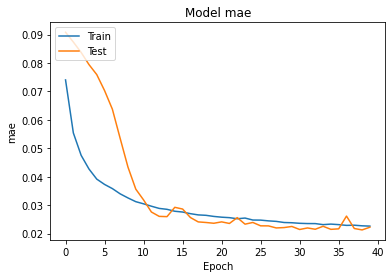

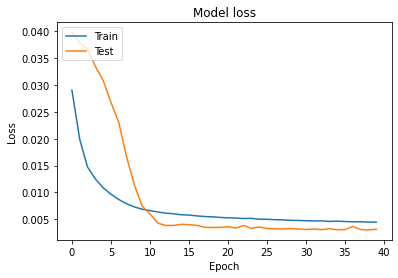

In [ ]:
%matplotlib inline
epochs=40
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.001,decay=0.00001)
autoencoder.compile(optimizer=opt, loss='mean_squared_error',metrics=['mae'])
history=autoencoder.fit(x_train, x_train,
                epochs=epochs,
                batch_size=256,
                validation_data=(x_test, x_test))
import matplotlib.pyplot as plt



# Plot training & validation accuracy values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

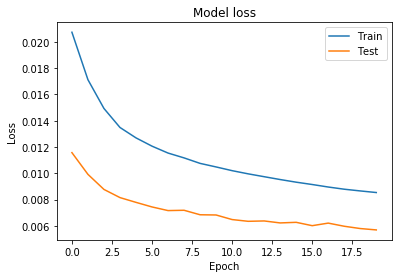

In [ ]:
#plt.figure(figsize=(26.5,15),dpi=100)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.savefig('C:\\Users\\pastal24\\Desktop\\thesis\\loss_CNN_input_100_deep.jpeg')
plt.show()



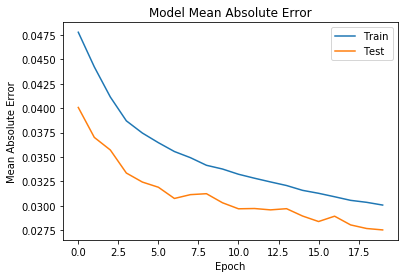

In [ ]:
#plt.figure(figsize=(26.5,15),dpi=100)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model Mean Absolute Error')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.savefig('C:\\Users\\pastal24\\Desktop\\thesis\\mae_CNN_input_100_deep4.jpeg')
plt.show()

In [ ]:
y = autoencoder.predict(x_test, verbose=0)
print('---Predicted---')
print(np.round(y[110][0].swapaxes(0,1),3))
print('---Actual---')
print(np.round(x_test[110][0].swapaxes(0,1), 3))

---Predicted---
[[-0.    -0.004 -0.003 -0.001 -0.001 -0.001 -0.001  0.    -0.001  0.001
  -0.     0.001  0.    -0.002 -0.002 -0.002 -0.    -0.002  0.     0.001
  -0.001  0.002 -0.001  0.001  0.001  0.001  0.001  0.001 -0.     0.002
   0.002 -0.005 -0.005 -0.013 -0.004 -0.004  0.023  0.037  0.057  0.058
   0.056  0.042  0.056  0.055  0.05   0.05   0.049  0.061  0.045  0.05
   0.061  0.06   0.057  0.046  0.047  0.047  0.032  0.045  0.04   0.04
   0.047  0.029  0.03   0.025 -0.004 -0.004 -0.005 -0.008 -0.002  0.001
  -0.     0.001  0.001  0.002  0.001  0.001  0.001  0.     0.    -0.001
   0.    -0.002  0.     0.001  0.     0.     0.     0.001  0.001  0.001
   0.     0.    -0.     0.     0.     0.     0.    -0.     0.001  0.   ]]
---Actual---
[[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.063 0.075 0.041 0.066 0.066 0.058 

In [ ]:
import json
from tensorflow.keras.models import model_from_json

In [ ]:
model_json = autoencoder.to_json()
with open("/content/gdrive/My Drive/CNN100_deep5.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
autoencoder.save_weights("/content/gdrive/My Drive/CNN100_deep5.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
df3=pd.DataFrame(objects['time'])

In [ ]:
df3

In [ ]:
df[(:,0)]

In [ ]:
Visible=Input(x_train.shape[1:])
                           
x=((Conv2D(64,(2,3),padding='same')))(Visible)

             
        
x=(Activation('relu'))(x)
        
x=((MaxPooling2D( (1,2) ,padding='same')))(x)  
x=((Conv2D(32, (2,3), padding='same')))(x)


encoded=(Activation('relu'))(x)
        

x=((UpSampling2D((1,2))))(encoded)
x=((Conv2D(64, (2,3), activation='relu', padding='same')))(x)
    


decoded=((Conv2D(1, (2,3), activation='linear', padding='same')))(x)
        

autoencoder = Model(Visible, decoded)

opt=tensorflow.keras.optimizers.Adam(learning_rate=4*1e-3,decay=1e-5)
autoencoder.compile(loss='mse',optimizer=opt,metrics=['mae'])
autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2, 100, 1)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 2, 100, 64)        448       
_________________________________________________________________
activation (Activation)      (None, 2, 100, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 50, 64)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 2, 50, 32)         12320     
_________________________________________________________________
activation_1 (Activation)    (None, 2, 50, 32)         0         
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 2, 100, 32)       